# 🖥️ Advanced Python – Host Data Analysis

Práctica desarrollada en Python como parte del módulo de  
**Python Avanzado – Máster en Data Science, Big Data y Business Analytics**

Autor: Marc Pérez Lleixà


#1. Importar todas las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import random

# 2. Inicializar algunas variables que después modificaremos.

In [ ]:
hostnames=[]
dataset=[]
df= None



# 3. Crear una función para generar los hostnames en base a unas reglas

In [ ]:
def set_hostnames (number_of_hosts:int)-> None :
  host_os= ['L']*40 +['S']*30 +['A']*20 +['H']*10 #Linux 40%, Solaris 30%, AIX 20%, HP-UX 10%
  host_env= ['D']*10 +['I']*10 +['T']*25 + ['S']*25 + ['P']*30 #Developement 10%, Integration 10%, Testing 25%, Staging 25%, Production 30%
  host_country= ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
  grupo_alpha=[]

  for i in range (number_of_hosts):
    host= random.choice (host_os) + random.choice(host_env) + random.choice (host_country)
    grupo_alpha.append(host)
    host+= str(grupo_alpha.count(host)).zfill(3)
    hostnames.append(host)


#4. Crear una función para obtener el nombre del SO.

In [ ]:
def get_os (host:str)->str:
  if host.startswith ('L'):
    return 'Linux'
  elif host.startswith ('S'):
    return 'Solaris'
  elif host.startswith ('A'):
    return 'AIX'
  elif host.startswith ('H'):
    return 'HP-UX'
  else:
    return 'Unknow'







# 5. Crear una función para obtener el nombre del entorno. (+0.5 puntos)

In [ ]:
def get_environment (host:str)->str:
  host_env= host[1]

  if host_env == 'D':
    return 'Developement'

  elif host_env == 'I':
    return 'Integration'

  elif host_env == 'T':
    return 'Testing'

  elif host_env == 'S':
    return 'Staging'

  elif host_env == 'P':
    return 'Production'

  else:
    return 'Unknow'




# 6. Crear una función para obtener el nombre del país.

In [ ]:
def get_country (host:str)->str:
  host_country= host[2:5]

  if host_country == 'NOR':
    return 'Norway'

  elif host_country == 'DEU':
    return 'Germany'

  elif host_country == 'ITA':
    return 'Italy'

  elif host_country == 'ESP':
    return 'Spain'

  elif host_country == 'IRL':
    return 'Ireland'

  elif host_country == 'FRA':
    return 'France'

  else:
    return 'Unknow'

# 7. Crear una función para generar el DataFrame.

In [ ]:
def set_dataframe(count: int) -> None:
    global df

    # Generar los hostnames
    set_hostnames(count)

    # Rellenar el dataset
    for codigo in hostnames:
        dataset.append({
            'hostname': codigo,
            'os': get_os(codigo),
            'environment': get_environment(codigo),
            'country': get_country(codigo),
            'node': int(codigo[-3:])
        })

    # Crear el DataFrame
    df = pd.DataFrame(dataset)




# 8. Crear el DataFrame.

In [ ]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,APESP001,AIX,Production,Spain,1
1,STNOR001,Solaris,Testing,Norway,1
2,LPIRL001,Linux,Production,Ireland,1
3,SSIRL001,Solaris,Staging,Ireland,1
4,LSIRL001,Linux,Staging,Ireland,1
...,...,...,...,...,...
1495,AIIRL015,AIX,Integration,Ireland,15
1496,HTDEU009,HP-UX,Testing,Germany,9
1497,SDITA006,Solaris,Developement,Italy,6
1498,SSITA022,Solaris,Staging,Italy,22


# 9. Guardar el DataFrame generado en un fichero CSV.

In [ ]:
df.to_csv(
    'hosts.csv',
    header= True,
    index= False
)

df_hosts=pd.read_csv('hosts.csv')
df_hosts

,hostname,os,environment,country,node
0,APESP001,AIX,Production,Spain,1
1,STNOR001,Solaris,Testing,Norway,1
2,LPIRL001,Linux,Production,Ireland,1
3,SSIRL001,Solaris,Staging,Ireland,1
4,LSIRL001,Linux,Staging,Ireland,1
...,...,...,...,...,...
1495,AIIRL015,AIX,Integration,Ireland,15
1496,HTDEU009,HP-UX,Testing,Germany,9
1497,SDITA006,Solaris,Developement,Italy,6
1498,SSITA022,Solaris,Staging,Italy,22


# 10. Generar un único gráfico, agrupando para cada país (country) los entornos (environment).

<Axes: xlabel='country'>

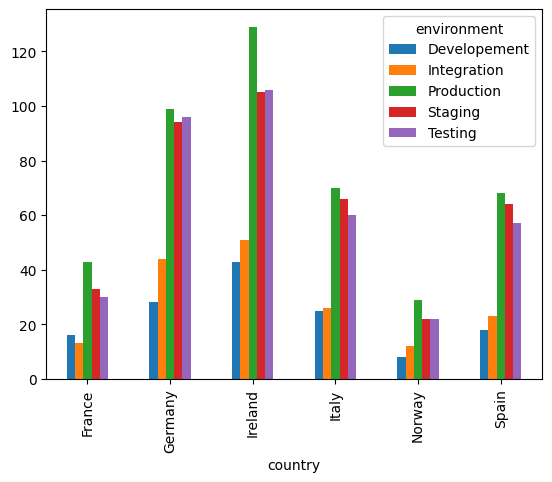

In [ ]:
g=df.groupby(['country','environment']).size()
g.unstack().plot(kind='bar')

#11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.

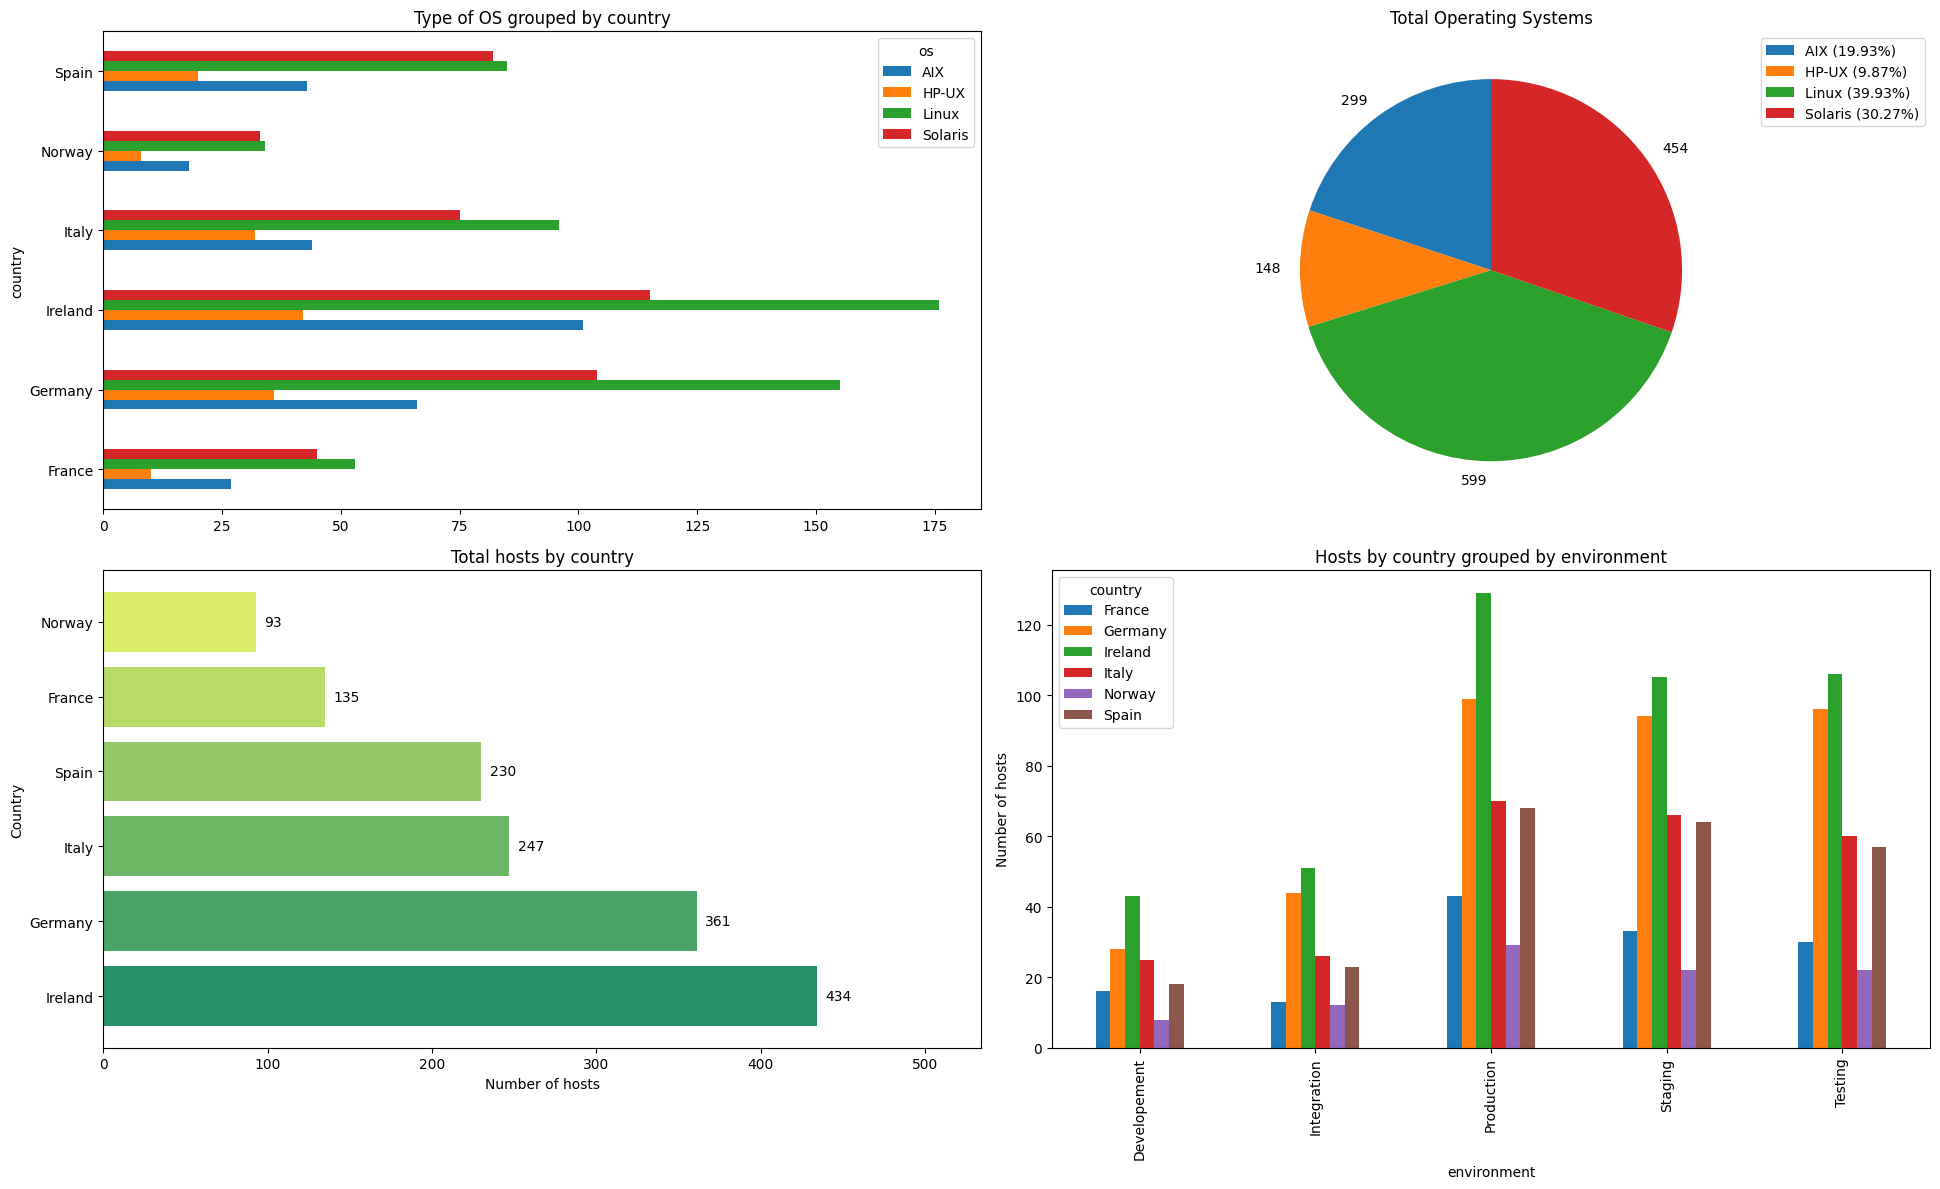

In [ ]:
# CREAR EL ESQUELETO DE LA FIGURA 2x2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# ----------------------------------------------------------------------
# GRÁFICO 1: ESQUINA SUPERIOR IZQUIERDA (Type of OS grouped by country)
# ----------------------------------------------------------------------

tabla1 = df.groupby(["country", "os"]).size().unstack()


tabla1.plot.barh(ax=ax1)
ax1.set_title("Type of OS grouped by country")

# ----------------------------------------------------------------------
# GRÁFICO 2: ESQUINA SUPERIOR DERECHA (Total Operating Systems)
# ----------------------------------------------------------------------


tabla2 = df.groupby("os").size()


porcentajes = (tabla2 / tabla2.sum() * 100).round(2)


labels = [str(v) for v in tabla2]


ax2.pie(
    tabla2,
    labels=labels,
    startangle=90,
    labeldistance=1.1
)


ax2.set_title("Total Operating Systems")


leyenda = [f"{os} ({pct}%)" for os, pct in porcentajes.items()]

ax2.legend(leyenda, loc='upper left', bbox_to_anchor=(1.05, 1))



# ----------------------------------------------------------------------
# GRÁFICO 3: ESQUINA INFERIOR IZQUIERDA (Total hosts by country)
# ----------------------------------------------------------------------

import seaborn as sns


hosts_country = df["country"].value_counts()





ax3.set_title("Total hosts by country")
ax3.set_xlabel("Number of hosts")
ax3.set_ylabel("Country")


for i, v in enumerate(hosts_country.values):

    ax3.text(v+5, i, str(v), va="center")


ax3.set_xlim(0, hosts_country.max() + 100)



colores = sns.color_palette("summer", len(hosts_country))


ax3.barh(hosts_country.index, hosts_country.values, color=colores)




# ----------------------------------------------------------------------
# GRÁFICO 4: (Hosts by country grouped by environment)
# ----------------------------------------------------------------------

tabla4 = df.groupby(["environment","country"]).size().unstack("country")


tabla4.plot(kind='bar', ax=ax4)



ax4.set_title("Hosts by country grouped by environment")
ax4.set_ylabel("Number of hosts")

ax4.legend(title='country')


fig.tight_layout()
plt.show()